In [1]:
from sklearn.svm import SVC
from time import time
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt(open("X_train.csv", "rb"), delimiter=",")
T_train = np.loadtxt(open("T_train.csv", "rb"), delimiter=",")
X_test = np.loadtxt(open("X_test.csv", "rb"), delimiter=",")
T_test = np.loadtxt(open("T_test.csv", "rb"), delimiter=",")

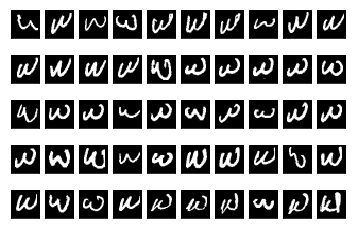

In [3]:
# Test plot
for i in range(50):
    plt.subplot(5,10,i+1)
    p = X_train[i+3050].reshape((28,28))
    plt.imshow(p, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# Caparison between 3 kernel

### Linear Kernel

In [10]:
tStart = time()
print("Linear Starts...")

svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("Linear Kernel costs : %.2f sec" %(tEnd - tStart))

Linear Starts...
Precision : 95.080%
Linear Kernel costs : 4.36 sec


### Polynomial Kernel

In [4]:
# Degree = 1
tStart = time()
print("Polynomial Starts... (Degree = 1)")

svm = SVC(kernel='poly', gamma='auto', degree=1)
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("Poly Kernel costs : %.2f sec\n" %(tEnd - tStart))


# Degree = 2
tStart = time()
print("Polynomial Starts... (Degree = 2)")

svm = SVC(kernel='poly', gamma='auto', degree=2)
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("Poly Kernel costs : %.2f sec\n" %(tEnd - tStart))


# Degree = 3
tStart = time()
print("Polynomial Starts... (Degree = 3)")

svm = SVC(kernel='poly', gamma='auto', degree=3)
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("Poly Kernel costs : %.2f sec\n" %(tEnd - tStart))


# Degree = 4
tStart = time()
print("Polynomial Starts... (Degree = 4)")

svm = SVC(kernel='poly', gamma='auto', degree=4)
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("Poly Kernel costs : %.2f sec" %(tEnd - tStart))

Polynomial Starts...
Precision : 94.800%
Poly Kernel costs : 14.27 sec

Polynomial Starts...
Precision : 88.080%
Poly Kernel costs : 34.96 sec

Polynomial Starts...
Precision : 34.520%
Poly Kernel costs : 53.22 sec

Polynomial Starts...
Precision : 23.720%
Poly Kernel costs : 53.13 sec


### RBF

In [5]:
tStart = time()
print("RBF Starts...")

svm = SVC(kernel='rbf', gamma=0.1)
svm.fit(X_train,T_train)

error_rate = 0
for i, v in enumerate(svm.predict(X_test)):
    if v!= T_test[i]:
        error_rate+=1
error_rate = error_rate / len(X_test)
print("Precision : {:.3%}".format(1-error_rate))

tEnd = time()
print("RBF Kernel costs : %.2f sec" %(tEnd - tStart))

RBF Starts...
Precision : 90.400%
RBF Kernel costs : 49.59 sec


# Grid Search in Cross-Validation

In [34]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [8, 9, 11, 12]},
                    {'kernel': ['poly'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [8, 9, 11, 12], 'degree': [1, 2, 3]},
                    {'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [8, 9, 11, 12]}]

scores = ['precision']

tStart = time()
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_test, T_test)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

tEnd = time()
minute = (int)((tEnd-tStart)/60)
second = (int)((tEnd-tStart)%60)
print("Totally takes %d min %f sec" %(minute, second))

In [35]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [3, 4, 6, 7]},
                    {'kernel': ['poly'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [3, 4, 6, 7], 'degree': [1, 2, 3]},
                    {'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [3, 4, 6, 7]}]

scores = ['precision', 'recall']

for score in scores:
    tStart = time()
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_test, T_test)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    T_true, T_pred = T_test, clf.predict(X_test)
    print(classification_report(T_true, T_pred))
    print()
    
    tEnd = time()
    minute = (int)((tEnd-tStart)/60)
    second = (int)((tEnd-tStart)%60)
    print("Totally takes %d min %f sec" %(minute, second))

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Best parameters set found on development set:

{'C': 3, 'kernel': 'linear'}

Grid scores on development set:

0.945 (+/-0.029) for {'C': 3, 'kernel': 'linear'}
0.945 (+/-0.029) for {'C': 4, 'kernel': 'linear'}
0.945 (+/-0.029) for {'C': 6, 'kernel': 'linear'}
0.945 (+/-0.029) for {'C': 7, 'kernel': 'linear'}

Totally takes 0 min 36.000000 sec


In [ ]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_test, T_test)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Linear + RBF

In [7]:
from sklearn.svm import SVC
from time import time
import sklearn
import math
import csv
import numpy as np
import scipy
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import linear_kernel

In [14]:
gamma = [1, 1e-1, 1e-2, 1e-3]

for gamma_ in gamma:
    tStart = time()
    print("User-Defined Starts... (for gamma=%g)" %gamma_)
    svm = SVC(kernel='precomputed')
    k_lin = linear_kernel(X_train, X_train)
    k_RBF = rbf_kernel(X_train, X_train, gamma_)
    gram_train = k_RBF+k_lin
    svm.fit(gram_train, T_train)
    
    k_lin = linear_kernel(X_test, X_train)
    k_RBF = rbf_kernel(X_test, X_train, gamma_)
    gram_test = k_RBF+k_lin

    error_rate = 0
    for i, v in enumerate(svm.predict(gram_test)):
        if v!= T_test[i]:
            error_rate+=1
    error_rate = error_rate / len(X_test)
    print("Precision : {:.3%}".format(1-error_rate))

    tEnd = time()
    print("User-Defined Kernel costs : %.2f sec" %(tEnd - tStart))
    print("----------")

User-Defined Starts... (for gamma=1)
Precision : 95.640%
User-Defined Kernel costs : 2.05 sec
----------
User-Defined Starts... (for gamma=0.1)
Precision : 95.640%
User-Defined Kernel costs : 1.96 sec
----------
User-Defined Starts... (for gamma=0.01)
Precision : 95.320%
User-Defined Kernel costs : 2.15 sec
----------
User-Defined Starts... (for gamma=0.001)
Precision : 95.080%
User-Defined Kernel costs : 2.08 sec
----------
